# Percobaan 4

Nama : Muhammad Fadhil Syahputra

NIM : 2211014210002

## 4.4.1 Transformasi – Z


Numerator (B): [4, 5, 6]
Denominator (A): [1, -2, -3]
Zero1: nan
Zero2: nan
Pole1: 3.0
Pole2: -1.0

Zero dari tf2zpk(): [-0.625+1.05326872j -0.625-1.05326872j]
Pole dari tf2zpk(): [ 3. -1.]
Gain: 4.0


/tmp/ipykernel_2904473/3118175211.py:19: RuntimeWarning: invalid value encountered in sqrt
  zero1 = (-B[1] + np.sqrt(D_zero)) / (2*B[0])
/tmp/ipykernel_2904473/3118175211.py:20: RuntimeWarning: invalid value encountered in sqrt
  zero2 = (-B[1] - np.sqrt(D_zero)) / (2*B[0])


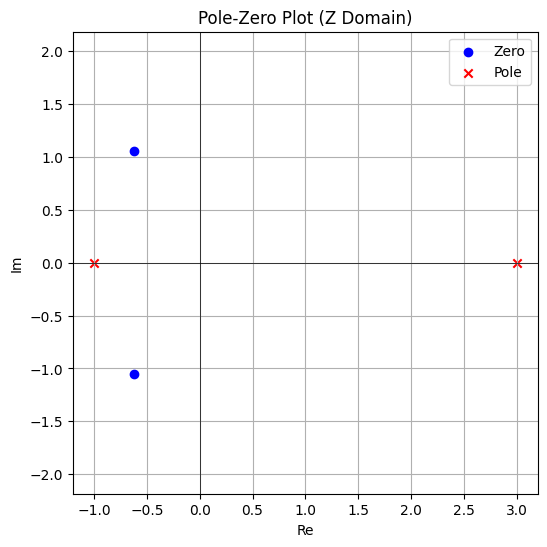

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Langkah 1: Koefisien filter
B = [4, 5, 6]         # Koefisien umpan maju (numerator)
A = [1, -2, -3]       # Koefisien umpan balik (denominator)

# Buat fungsi alih dalam domain-z
system = signal.dlti(B, A)

# Cetak numerator dan denominator
print("Numerator (B):", B)
print("Denominator (A):", A)

# Langkah 2: Hitung Zero dan Pole secara analitik
# Zero dari persamaan kuadrat B(z): 4z^2 + 5z + 6 = 0
D_zero = B[1]**2 - 4*B[0]*B[2]
zero1 = (-B[1] + np.sqrt(D_zero)) / (2*B[0])
zero2 = (-B[1] - np.sqrt(D_zero)) / (2*B[0])

# Pole dari persamaan kuadrat A(z): z^2 - 2z - 3 = 0
D_pole = A[1]**2 - 4*A[0]*A[2]
pole1 = (-A[1] + np.sqrt(D_pole)) / (2*A[0])
pole2 = (-A[1] - np.sqrt(D_pole)) / (2*A[0])

print(f"Zero1: {zero1}")
print(f"Zero2: {zero2}")
print(f"Pole1: {pole1}")
print(f"Pole2: {pole2}")

# Bandingkan dengan hasil dari scipy.signal.tf2zpk (jika ingin verifikasi)
z, p, k = signal.tf2zpk(B, A)
print("\nZero dari tf2zpk():", z)
print("Pole dari tf2zpk():", p)
print("Gain:", k)

# (Opsional) Plot lokasi zero-pole
plt.figure(figsize=(6, 6))
plt.scatter(np.real(z), np.imag(z), marker='o', color='blue', label='Zero')
plt.scatter(np.real(p), np.imag(p), marker='x', color='red', label='Pole')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Pole-Zero Plot (Z Domain)')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


## 4.4.2 Pengenalan Diagram Pole-Zero

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def zplane(b, a):
    """Plot pole-zero diagram."""
    z, p, k = signal.tf2zpk(b, a)

    fig, ax = plt.subplots()
    # Plot zeros and poles
    ax.scatter(np.real(z), np.imag(z), s=50, marker='o', facecolors='none', edgecolors='b', label='Zeros')
    ax.scatter(np.real(p), np.imag(p), s=50, marker='x', color='r', label='Poles')
    
    # Unit circle
    theta = np.linspace(0, 2*np.pi, 300)
    ax.plot(np.cos(theta), np.sin(theta), 'k--', linewidth=1, label='Unit Circle')
    
    # Formatting
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    ax.set_title('Pole-Zero Plot in Z-Domain')
    ax.grid(True)
    ax.axis('equal')
    ax.legend()
    plt.show()


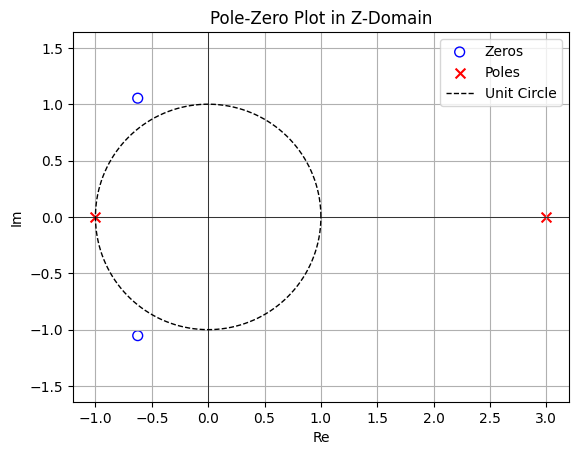

In [5]:
B = [4, 5, 6]
A = [1, -2, -3]

zplane(B, A)

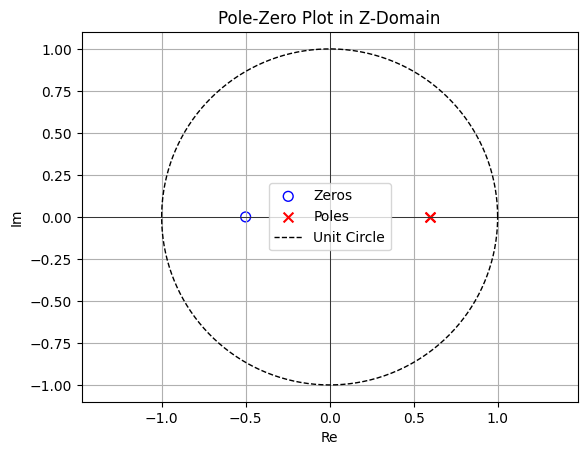

In [6]:
B2 = [1, 0.5]
A2 = [1, -1.2, 0.36]

zplane(B2, A2)

## 4.4.3 Invers Transformasi – Z

In [7]:
import numpy as np
from scipy.signal import residuez, deconvolve, sos2tf

results = {}

# Langkah 1 – Ekspansi Pecahan Parsial (residuez) untuk num = [0, 1]; den = [1, -0.25, -0.375]
num1 = [0, 1]
den1 = [1, -0.25, -0.375]
R1, P1, K1 = residuez(num1, den1)
results["Langkah 1"] = {
    "Residu (R)": R1,
    "Pole (P)": P1,
    "Konstanta (K)": K1
}

# Langkah 2 – Ekspansi Pecahan Parsial untuk fungsi dari 4.2 no.1 (misal)
num2 = [4, 5, 6]
den2 = [1, -2, -3]
R2, P2, K2 = residuez(num2, den2)
results["Langkah 2"] = {
    "Residu (R)": R2,
    "Pole (P)": P2,
    "Konstanta (K)": K2
}

# Langkah 3 – Ekspansi Deret (deconv)
b3 = [1, 2, 1]
a3 = [1, -1, 0.3561]
n3 = 5
b3_ext = b3 + [0] * (n3 - 1)
x3, r3 = deconvolve(b3_ext, a3)
results["Langkah 3"] = {
    "Koefisien Deret Pertama": x3[:n3]
}

# Langkah 4 – Ekspansi Deret dengan sos2tf
n4 = 5
N1 = [1, -1.22346, 1]; D1 = [1, -1.433509, 0.85811]
N2 = [1, -0.437833, 1]; D2 = [1, -1.293601, 0.556926]
N3 = [1, 1, 0]; D3 = [1, -0.612159, 0]

sos = np.array([
    N1 + D1,
    N2 + D2,
    N3 + D3
])

b4, a4 = sos2tf(sos)
b4_ext = list(b4) + [0]*(n4-1)
x4, r4 = deconvolve(b4_ext, a4)
results["Langkah 4"] = {
    "Koefisien Deret Pertama dari sos": x4[:n4]
}

# Langkah 5 – Ekspansi Pecahan Parsial dari hasil sos2tf
R5, P5, K5 = residuez(b4, a4)
results["Langkah 5"] = {
    "Residu (R)": R5,
    "Pole (P)": P5,
    "Konstanta (K)": K5
}

results


{'Langkah 1': {'Residu (R)': array([-0.8,  0.8]),
  'Pole (P)': array([-0.5 ,  0.75]),
  'Konstanta (K)': array([], dtype=float64)},
 'Langkah 2': {'Residu (R)': array([1.25, 4.75]),
  'Pole (P)': array([-1.,  3.]),
  'Konstanta (K)': array([-2.])},
 'Langkah 3': {'Koefisien Deret Pertama': array([1.        , 3.        , 3.6439    , 2.5756    , 1.27800721])},
 'Langkah 4': {'Koefisien Deret Pertama dari sos': array([ 1.        ,  2.677976  ,  4.8780108 ,  7.84706581, 10.27465364])},
 'Langkah 5': {'Residu (R)': array([ 36.72522519+2.94057541e-14j, -17.66759865+7.42812661e+00j,
         -17.66759865-7.42812661e+00j,   1.51407754-3.96165736e+00j,
           1.51407754+3.96165736e+00j]),
  'Pole (P)': array([0.612159 +0.j        , 0.6468005-0.37225678j,
         0.6468005+0.37225678j, 0.7167545-0.58683301j,
         0.7167545+0.58683301j]),
  'Konstanta (K)': array([-3.41818296])}}

## 4.4.4 Implementasi Persamaan Domain-Z Dalam Penentuan Jenis Filter

In [8]:
import numpy as np
from scipy.signal import residuez, deconvolve, sos2tf

results = {}

# Langkah 1 – Ekspansi Pecahan Parsial untuk fungsi [0, 1] / [1, -0.25, -0.375]
num1 = [0, 1]
den1 = [1, -0.25, -0.375]
R1, P1, K1 = residuez(num1, den1)
results["Langkah 1 – Pecahan Parsial"] = {
    "Residu (R)": R1,
    "Pole (P)": P1,
    "Konstanta (K)": K1
}

# Langkah 2 – Ekspansi Pecahan Parsial untuk fungsi dari 4.2 no.1 (misal num = [4,5,6], den = [1,-2,-3])
num2 = [4, 5, 6]
den2 = [1, -2, -3]
R2, P2, K2 = residuez(num2, den2)
results["Langkah 2 – Pecahan Parsial"] = {
    "Residu (R)": R2,
    "Pole (P)": P2,
    "Konstanta (K)": K2
}

# Langkah 3 – Ekspansi Deret (deconv) dari fungsi X(z) = (1 + 2z⁻¹ + z⁻²) / (1 - z⁻¹ + 0.3561z⁻²)
b3 = [1, 2, 1]
a3 = [1, -1, 0.3561]
n3 = 5
b3_ext = b3 + [0] * (n3 - 1)
x3, r3 = deconvolve(b3_ext, a3)
results["Langkah 3 – Ekspansi Deret"] = {
    "Koefisien Deret Pertama": x3[:n3]
}

# Langkah 4 – Fungsi transfer dalam bentuk SOS dan ekspansi deret
n4 = 5
N1 = [1, -1.22346, 1]; D1 = [1, -1.433509, 0.85811]
N2 = [1, -0.437833, 1]; D2 = [1, -1.293601, 0.556926]
N3 = [1, 1, 0]; D3 = [1, -0.612159, 0]

# Gabungkan jadi SOS matrix (3 baris, masing-masing 6 kolom)
sos = np.array([
    N1 + D1,
    N2 + D2,
    N3 + D3
])

b4, a4 = sos2tf(sos)
b4_ext = list(b4) + [0] * (n4 - 1)
x4, r4 = deconvolve(b4_ext, a4)
results["Langkah 4 – Deret dari sos2tf"] = {
    "Koefisien Deret Pertama dari sos": x4[:n4]
}

# Langkah 5 – Pecahan Parsial dari hasil sos2tf
R5, P5, K5 = residuez(b4, a4)
results["Langkah 5 – Pecahan Parsial dari sos2tf"] = {
    "Residu (R)": R5,
    "Pole (P)": P5,
    "Konstanta (K)": K5
}

# Tampilkan hasil
for step, output in results.items():
    print(f"\n{step}")
    for key, value in output.items():
        print(f"{key}:\n{value}")



Langkah 1 – Pecahan Parsial
Residu (R):
[-0.8  0.8]
Pole (P):
[-0.5   0.75]
Konstanta (K):
[]

Langkah 2 – Pecahan Parsial
Residu (R):
[1.25 4.75]
Pole (P):
[-1.  3.]
Konstanta (K):
[-2.]

Langkah 3 – Ekspansi Deret
Koefisien Deret Pertama:
[1.         3.         3.6439     2.5756     1.27800721]

Langkah 4 – Deret dari sos2tf
Koefisien Deret Pertama dari sos:
[ 1.          2.677976    4.8780108   7.84706581 10.27465364]

Langkah 5 – Pecahan Parsial dari sos2tf
Residu (R):
[ 36.72522519+2.94057541e-14j -17.66759865+7.42812661e+00j
 -17.66759865-7.42812661e+00j   1.51407754-3.96165736e+00j
   1.51407754+3.96165736e+00j]
Pole (P):
[0.612159 +0.j         0.6468005-0.37225678j 0.6468005+0.37225678j
 0.7167545-0.58683301j 0.7167545+0.58683301j]
Konstanta (K):
[-3.41818296]


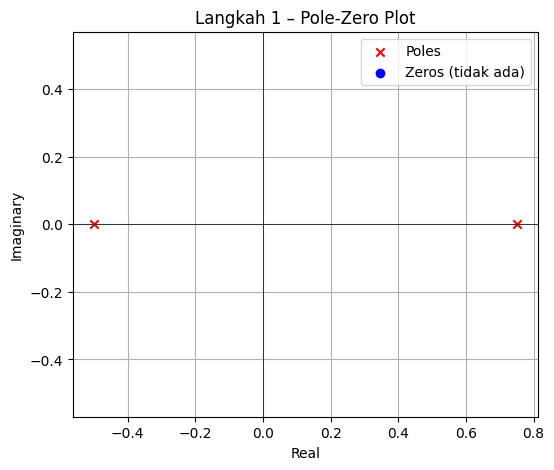

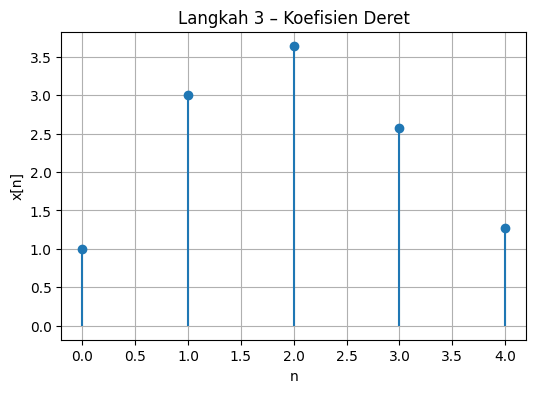

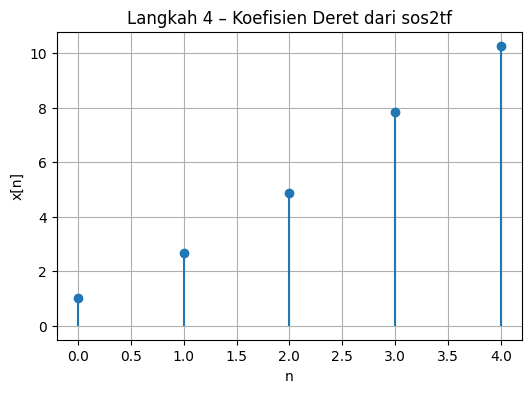

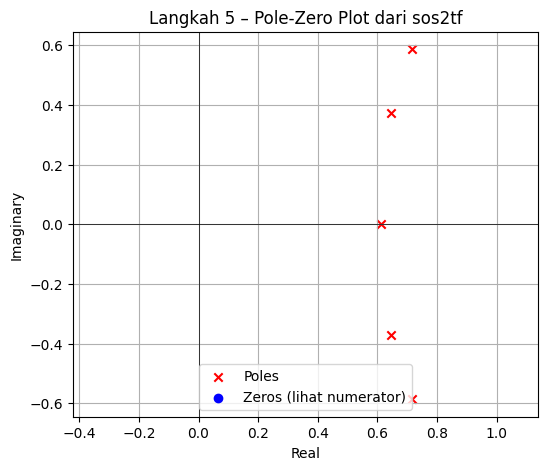

In [9]:
import matplotlib.pyplot as plt

# Visualisasi 1: Pole-Zero Plot dari Langkah 1
plt.figure(figsize=(6, 5))
plt.scatter(np.real(P1), np.imag(P1), color='red', marker='x', label='Poles')
plt.scatter([], [], color='blue', marker='o', label='Zeros (tidak ada)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Langkah 1 – Pole-Zero Plot")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# Visualisasi 2: Respon Deret Langkah 3
plt.figure(figsize=(6, 4))
plt.stem(range(n3), x3[:n3], basefmt=" ")
plt.title("Langkah 3 – Koefisien Deret")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)
plt.show()

# Visualisasi 3: Respon Deret Langkah 4 dari sos2tf
plt.figure(figsize=(6, 4))
plt.stem(range(n4), x4[:n4], basefmt=" ")
plt.title("Langkah 4 – Koefisien Deret dari sos2tf")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)
plt.show()

# Visualisasi 4: Pole-Zero Plot dari Langkah 5 (hasil sos2tf)
plt.figure(figsize=(6, 5))
plt.scatter(np.real(P5), np.imag(P5), color='red', marker='x', label='Poles')
plt.scatter([], [], color='blue', marker='o', label='Zeros (lihat numerator)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Langkah 5 – Pole-Zero Plot dari sos2tf")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()
